In [38]:
from pyAudioAnalysis import MidTermFeatures as mF
import os
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.load('Feature Extraction/Features/MidFeatures_0.50_0.10.npz')

In [3]:
fn = data['fn']
mFeatures = data['mFeatures']
m_step = data['m_step']
m_win = data['m_win']
s_step = data['s_step']
s_win = data['s_win']

In [73]:
print(len(fn))
print(fn)

138
['zcr_mean' 'energy_mean' 'energy_entropy_mean' 'spectral_centroid_mean'
 'spectral_spread_mean' 'spectral_entropy_mean' 'spectral_flux_mean'
 'spectral_rolloff_mean' 'mfcc_1_mean' 'mfcc_2_mean' 'mfcc_3_mean'
 'mfcc_4_mean' 'mfcc_5_mean' 'mfcc_6_mean' 'mfcc_7_mean' 'mfcc_8_mean'
 'mfcc_9_mean' 'mfcc_10_mean' 'mfcc_11_mean' 'mfcc_12_mean' 'mfcc_13_mean'
 'chroma_1_mean' 'chroma_2_mean' 'chroma_3_mean' 'chroma_4_mean'
 'chroma_5_mean' 'chroma_6_mean' 'chroma_7_mean' 'chroma_8_mean'
 'chroma_9_mean' 'chroma_10_mean' 'chroma_11_mean' 'chroma_12_mean'
 'chroma_std_mean' 'delta zcr_mean' 'delta energy_mean'
 'delta energy_entropy_mean' 'delta spectral_centroid_mean'
 'delta spectral_spread_mean' 'delta spectral_entropy_mean'
 'delta spectral_flux_mean' 'delta spectral_rolloff_mean'
 'delta mfcc_1_mean' 'delta mfcc_2_mean' 'delta mfcc_3_mean'
 'delta mfcc_4_mean' 'delta mfcc_5_mean' 'delta mfcc_6_mean'
 'delta mfcc_7_mean' 'delta mfcc_8_mean' 'delta mfcc_9_mean'
 'delta mfcc_10_mean' 'del

In [81]:
labels = pd.read_csv('Feature Extraction/Categories.csv')
mFeatures_df = pd.DataFrame(mFeatures, columns=fn)
df_mid = pd.concat((labels,mFeatures_df), axis=1)

In [84]:
df_mid_2 = pd.get_dummies(df_mid.emotion, prefix='emotion')
df_mid_2 = pd.concat((df_mid,df_mid_2), axis=1)
df_mid_2

,actor,sentence,emotion,intensity,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_12_std,delta chroma_std_std,bpm,ratio,emotion_ANG,emotion_DIS,emotion_FEA,emotion_HAP,emotion_NEU,emotion_SAD
0,1001,DFA,ANG,XX,0.103094,0.010426,2.965602,0.200915,0.226480,0.772772,...,0.003024,0.009549,218.181818,0.133333,1,0,0,0,0,0
1,1001,DFA,DIS,XX,0.095550,0.006244,3.041436,0.196182,0.225279,0.734872,...,0.003226,0.008867,266.666667,0.160000,0,1,0,0,0,0
2,1001,DFA,FEA,XX,0.084617,0.012109,3.013764,0.187499,0.225614,0.616980,...,0.006532,0.008469,266.666667,0.125000,0,0,1,0,0,0
3,1001,DFA,HAP,XX,0.085034,0.006593,3.017314,0.196016,0.226223,0.645377,...,0.006262,0.008800,300.000000,0.160000,0,0,0,1,0,0
4,1001,DFA,NEU,XX,0.080987,0.009392,3.016705,0.187943,0.220785,0.622735,...,0.004862,0.008996,266.666667,0.113636,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,1091,WSI,FEA,XX,0.119749,0.009557,3.034401,0.222544,0.249521,0.612356,...,0.008012,0.008862,266.666667,0.099099,0,0,1,0,0,0
7438,1091,WSI,HAP,XX,0.097386,0.011001,3.038871,0.207336,0.251656,0.457459,...,0.005587,0.009645,480.000000,0.109091,0,0,0,1,0,0
7439,1091,WSI,NEU,XX,0.172532,0.013193,3.031445,0.268500,0.257126,0.822959,...,0.009597,0.010344,400.000000,0.114943,0,0,0,0,1,0
7440,1091,WSI,SAD,XX,0.122507,0.004782,3.063951,0.234285,0.259562,0.646172,...,0.008484,0.009593,300.000000,0.113636,0,0,0,0,0,1


In [106]:
df_mid_2['ANG_or_HAP'] = df_mid_2.emotion_ANG+2*df_mid_2.emotion_HAP

In [107]:
df_mid_2

,actor,sentence,emotion,intensity,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_std_std,bpm,ratio,emotion_ANG,emotion_DIS,emotion_FEA,emotion_HAP,emotion_NEU,emotion_SAD,ANG_or_HAP
0,1001,DFA,ANG,XX,0.103094,0.010426,2.965602,0.200915,0.226480,0.772772,...,0.009549,218.181818,0.133333,1,0,0,0,0,0,1
1,1001,DFA,DIS,XX,0.095550,0.006244,3.041436,0.196182,0.225279,0.734872,...,0.008867,266.666667,0.160000,0,1,0,0,0,0,0
2,1001,DFA,FEA,XX,0.084617,0.012109,3.013764,0.187499,0.225614,0.616980,...,0.008469,266.666667,0.125000,0,0,1,0,0,0,0
3,1001,DFA,HAP,XX,0.085034,0.006593,3.017314,0.196016,0.226223,0.645377,...,0.008800,300.000000,0.160000,0,0,0,1,0,0,2
4,1001,DFA,NEU,XX,0.080987,0.009392,3.016705,0.187943,0.220785,0.622735,...,0.008996,266.666667,0.113636,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,1091,WSI,FEA,XX,0.119749,0.009557,3.034401,0.222544,0.249521,0.612356,...,0.008862,266.666667,0.099099,0,0,1,0,0,0,0
7438,1091,WSI,HAP,XX,0.097386,0.011001,3.038871,0.207336,0.251656,0.457459,...,0.009645,480.000000,0.109091,0,0,0,1,0,0,2
7439,1091,WSI,NEU,XX,0.172532,0.013193,3.031445,0.268500,0.257126,0.822959,...,0.010344,400.000000,0.114943,0,0,0,0,1,0,0
7440,1091,WSI,SAD,XX,0.122507,0.004782,3.063951,0.234285,0.259562,0.646172,...,0.009593,300.000000,0.113636,0,0,0,0,0,1,0


In [ ]:
fig, axes= plt.subplots(nrows=2, ncols=2)
x = [1,2,3,4,5]
y = [x**3 for x in x]
axes[0][0].plot(x,y)
axes[0][0].set_title("Normal Plot")
axes[1][1].plot(y,x)
axes[1][1].set_title("Inverted Plot")
plt.tight_layout()
plt.show()

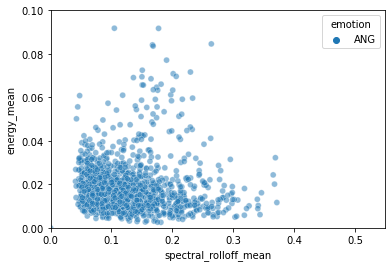

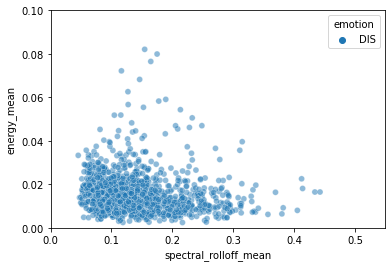

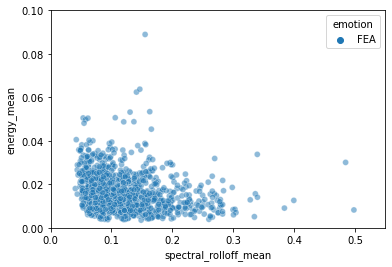

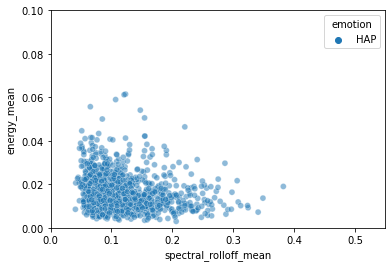

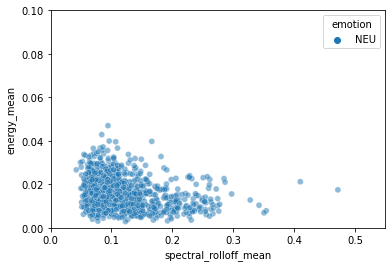

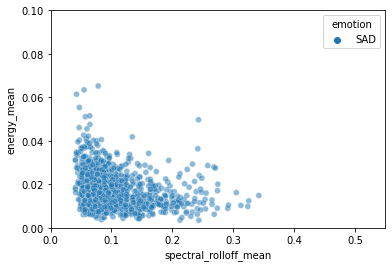

In [146]:
feat1 = 'spectral_rolloff_mean'
feat2 = 'energy_mean'
color = 'emotion'

for emotion in np.unique(df_mid_2.emotion.values):
    plt.figure()
    sns.scatterplot(data=df_mid_2[df_mid_2.emotion.isin([emotion])],
                    x=feat1,  y=feat2,
                    hue=color,
                    alpha=0.5)

    plt.xlabel(feat1)
    plt.ylabel(feat2)

    plt.xlim([0,0.55])
    plt.ylim([0,0.1])

In [139]:
from sklearn.svm import SVC

In [147]:
feat1 = 'spectral_rolloff_mean'
feat2 = 'energy_mean'

emotion1 = 'ANG'
emotion2 = 'HAP'

F1 = df_mid_2[df_mid_2.emotion.isin([emotion1])]
F2 = df_mid_2[df_mid_2.emotion.isin([emotion2])]

f1 = np.array([F1[feat1],
               F1[feat2]])
f2 = np.array([F2[feat1],
               F2[feat2]])

# plot 2D features
p1 = go.Scatter(x=f1[0, :],  y=f1[1, :], name=emotion1,
                marker=dict(size=10,color='rgba(255, 182, 193, .9)'),
                mode='markers')
p2 = go.Scatter(x=f2[0, :], y=f2[1, :],  name=emotion2, 
                marker=dict(size=10,color='rgba(100, 100, 220, .9)'),
                mode='markers')
mylayout = go.Layout(xaxis=dict(title=feat1),
                     yaxis=dict(title=feat2))

y = np.concatenate((np.zeros(f1.shape[1]), np.ones(f2.shape[1]))) 
f = np.concatenate((f1.T, f2.T), axis = 0)

# train the svm classifier
cl = SVC(kernel='rbf', C=20) 
cl.fit(f, y) 
# apply the trained model on the points of a grid
x_ = np.arange(f[:, 0].min(), f[:, 0].max(), 0.002) 
y_ = np.arange(f[:, 1].min(), f[:, 1].max(), 0.002) 
xx, yy = np.meshgrid(x_, y_) 
Z = cl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) / 2 
# and visualize the grid on the same plot (decision surfaces)
cs = go.Heatmap(x=x_, y=y_, z=Z, showscale=False, 
               colorscale= [[0, 'rgba(255, 182, 193, .3)'], 
                           [1, 'rgba(100, 100, 220, .3)']]) 
mylayout = go.Layout(xaxis=dict(title="spectral_centroid_mean"),
                     yaxis=dict(title="energy_entropy_mean"))
plotly.offline.iplot(go.Figure(data=[p1, p2, cs], layout=mylayout))